<div style="text-align: center;padding-top:10px;padding-bottom:10px">
    <a href="https://geostatisticslessons.com/" target="_blank" style="color:#93c6c7" >
    <img src="https://geostatisticslessons.com/favicon-96x96.png" alt="Geostatistics Lessons Link" style="width:100px">
    </a>
</div>

<div style="text-align: center">
    <h1 style="color:#00797C;padding-bottom:0px">The Nugget Effect</h1>
    <h2 style="color:#00797C;padding-bottom:20px">A Companion Notebook to Geostatistics Lessons</h2>    
</div>

<p class="author" style="padding: 0;"><center><b>Eric Daniels and Diogo Silva</b></center></p>
<p class="date" style="padding: 0;"><center><b>May 8, 2024</b></center></p>

---

# Outline

The following notebook provides a demonstration and review of theory presented in [The Nugget Effect ](https://geostatisticslessons.com/lessons/nuggeteffect) Geostatistics Lesson. The nugget effect describes the short scale randomness observed in regionalized variables. This notebook explores the relationship between the nugget effect and sample volume. Ultimately, that relationship can be used to infer an appropriate nugget value for geostatistical modeling.


1. **Load, Desurvey and Visualize Data**
    - Load and desurvey example data to visualize spatial variability.

1. **Inspect Variability of Increasing Scale**
    - Observe downhole variablity at a series of increasing composite lengths.

2. **Variography**
    - Calculate experimental variograms at increasing scales to further emphasize the relationship between variability and scale. Demonstrate good and bad practice for informing the nugget effect in a converntional workflow.

4. **Volume Based Nugget Inference**
    - Demonstrate the potential calculation (not visual assessment) of a nugget effect based on the relationship between composite length and short scale variability.


The presented workflow may be extended to represent other deposits. Inline annotations with each step will note practical adjustments that may be necessary for this extension.

---

Import required packages:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rmsp; rmsp.activate()  # See: https://resourcemodelingsolutions.com/rmsp

License cleq45ynq00hxgomxqjf0a9fc checked out by cleq3u00o0001mxb8e7xapuw4 to cleu6f8al000bs23fjbek6ljd expires in 4 minutes. RMSP is up to date!


---
# Load, Desurvey and Visualize Data

Load the example interval data:

In [2]:
assay = rmsp.load_example_data("copper_assay")
assay.head()

,DHID,FROM,TO,CU,ELEM_A,ELEM_B,ELEM_C,ELEM_D,DENSITY
0,DDH-0001,81.66,82.42,1.8830,NaN,0.000,308.27,0.395,3.372
1,DDH-0001,82.42,83.00,3.0099,1.925,114.967,1137.83,NaN,4.556
2,DDH-0001,83.00,84.00,4.1806,2.440,205.467,2119.41,4.741,4.390
3,DDH-0001,84.00,85.00,3.2041,2.682,239.959,2906.29,6.466,4.589
4,DDH-0001,85.00,86.00,2.3910,2.055,220.492,2023.57,6.562,4.452


Collar and survey data will also be needed for desurveying composites at varying scales:

In [3]:
collar = rmsp.load_example_data("copper_collar")
display(collar.head())
survey = rmsp.load_example_data("copper_survey")
survey.head()

,DHID,EASTING,NORTHING,ELEVATION,DHLENGTH
0,DDH-0001,820.945,12243.879,1210.841,155.55
1,DDH-0002,943.485,12212.356,1310.959,242.59
2,DDH-0003,943.482,12211.984,1311.670,302.08
3,DDH-0004,899.313,12245.518,1227.702,155.40
4,DDH-0005,742.768,12192.952,1155.945,151.05


,DHID,DEPTH,AZIMUTH,INCLINATION
0,DDH-0001,0.0,-0.22,-69.98
1,DDH-0001,40.0,-1.57,-69.10
2,DDH-0001,80.0,1.73,-69.50
3,DDH-0001,140.0,5.32,-69.37
4,DDH-0002,193.0,-0.76,-62.62


Desurvey and visualize the dataset. This is not explicitly required for calculations that follow, but facilitates visualizing the data to understand the structure of variability.

In [4]:
desurv = rmsp.desurvey(collar, survey, assay)
desurv.head()

,DHID,FROM,TO,CU,ELEM_A,ELEM_B,ELEM_C,ELEM_D,DENSITY,x,startx,endx,y,starty,endy,z,startz,endz
0,DDH-0001,81.66,82.42,1.8830,NaN,0.000,308.27,0.395,3.372,820.761532,820.757255,820.765862,12272.706057,12272.573029,12272.839087,1134.034730,1134.390659,1133.678803
1,DDH-0001,82.42,83.00,3.0099,1.925,114.967,1137.83,NaN,4.556,820.769202,820.765862,820.772573,12272.940611,12272.839087,12273.042137,1133.407175,1133.678803,1133.135548
2,DDH-0001,83.00,84.00,4.1806,2.440,205.467,2119.41,4.741,4.390,820.778457,820.772573,820.784434,12273.217183,12273.042137,12273.392234,1132.667227,1133.135548,1132.198910
3,DDH-0001,84.00,85.00,3.2041,2.682,239.959,2906.29,6.466,4.589,820.790503,820.784434,820.796664,12273.567288,12273.392234,12273.742345,1131.730594,1132.198910,1131.262281
4,DDH-0001,85.00,86.00,2.3910,2.055,220.492,2023.57,6.562,4.452,820.802918,820.796664,820.809263,12273.917406,12273.742345,12274.092470,1130.793971,1131.262281,1130.325663


Visualize the desurveyed data:

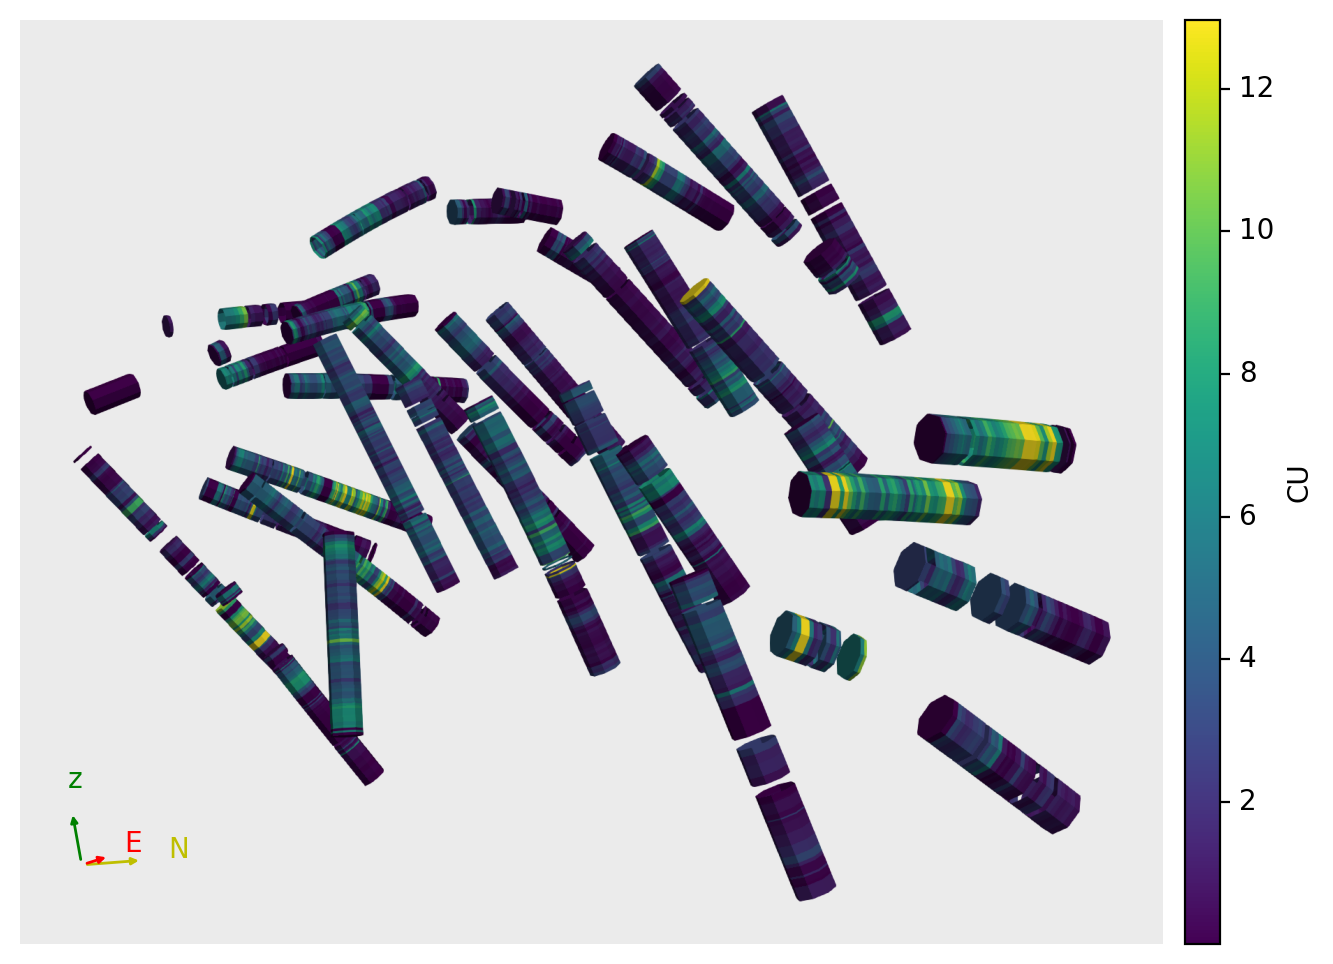

In [5]:
viewer = desurv.view3d('CU')
viewer.set_camera(view_matrix=[1395.17,12011.55,1013.23,863.55,12277.38,1099.32,0.19,0.07,0.98])
_ = viewer.show_static(figsize=(10, 6))

---
# Inspect Variability of Increasing Scales

Establish composite lengths to evaluate and associated gradient of colors for presentation:

In [6]:
comp_lengths = np.arange(1, 6)
comp_colors = mpl.colormaps["coolwarm"](np.linspace(0, 1, len(comp_lengths)))
comp_lengths

array([1, 2, 3, 4, 5])

Composite and desurvey the intervals at each scale and store each set of  composites:

In [7]:
composites = {}
for length in comp_lengths:
    comp_intervals = rmsp.get_runlength_intervals(assay, length)
    comps_dict, comps = rmsp.composite(assay, comp_intervals)
    composites[length] = rmsp.desurvey(collar, survey, comps).to_pointdata()

Select a single drillhole from the assays and observe the reduction in variability as sample length increases:

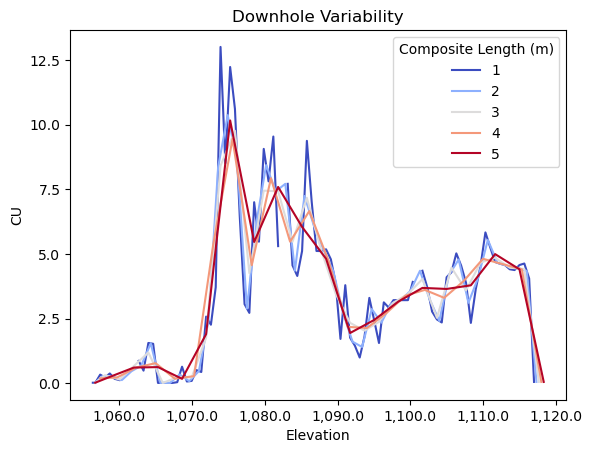

In [8]:
dh_name = "DDH-0005"

fig, ax = plt.subplots()
for i, (k, v) in enumerate(composites.items()):
    single_dh_assay = v[v.DHID == dh_name]
    ax.plot(
        single_dh_assay["z"],
        single_dh_assay["CU"],
        label=k,
        color=comp_colors[i]
    )
rmsp.format_plot(ax, xlabel="Elevation", ylabel="CU", title="Downhole Variability")
_ = ax.legend(title="Composite Length (m)")

---
# Variography

The variogram is used to quantify average variablity across sampled locations within the defined search. Here, the same reduction in variance and short scale randomness can be seen with increased support volume.

Begin by defining experimental variogram lags:

In [9]:
lags = rmsp.Lags(5.0, 2.5, 15)
lags

Experimental variogram lag definition:
       Distance (m) Tolerance (m) Min. Distance (m) Max. Distance (m)
Lag 0           5.0           2.5               2.5               7.5
Lag 1          10.0           2.5               7.5              12.5
Lag 2          15.0           2.5              12.5              17.5
Lag 3          20.0           2.5              17.5              22.5
Lag 4          25.0           2.5              22.5              27.5
Lag 5          30.0           2.5              27.5              32.5
Lag 6          35.0           2.5              32.5              37.5
Lag 7          40.0           2.5              37.5              42.5
Lag 8          45.0           2.5              42.5              47.5
Lag 9          50.0           2.5              47.5              52.5
Lag 10         55.0           2.5              52.5              57.5
Lag 11         60.0           2.5              57.5              62.5
Lag 12         65.0           2.5              62.5

Use the `lags` to create an omnidirectional variogram `search`:

In [10]:
search = rmsp.ExpVarioSearch(0, 0, lags, azmtol=90, incltol=90)
search

Experimental variogram search definition:
                      Direction (deg) Tolerance (deg) Bandwidth (m)
Azimuth (Angle 1)                 0.0            90.0       1.0e+21
Inclination (Angle 2)             0.0            90.0       1.0e+21
Angle 3                           0.0                              

Apply this search and perform variogram model fitting for each set of composites. Notice that the autofit variogram models yield decreasing nugget values as the composite length increases. Also note that the nugget effect is the most challenging parameter to fit due to the required extrapolation, motivating calculation of the nugget effect in the final section.

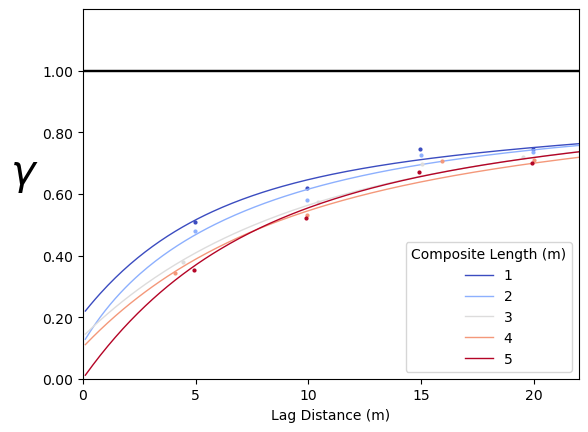

In [11]:
fig, ax = plt.subplots()

for i, (k, v) in enumerate(composites.items()):
    expvario_omni = rmsp.ExpVario().calculate(v, "CU", search)
    vario_model_omni = rmsp.VarioModel.fit_experimental(
        expvario_omni,
        shapes="exponential",
        ranges12_bounds=1,
        ranges13_bounds=1,
    )
    expvario_omni.plot(ax=ax, xlim=(0, 22), c=comp_colors[i])
    vario_model_omni.plot_draw(ax=ax, c=comp_colors[i], label=k)
_ = ax.legend(title="Composite Length (m)")

## Directional variograms and the nugget effect

The nugget effect does not vary with direction and is best calculated using a variogram search that incorporates a large amount of nearby data to adequately observe the short scale randomness and variography. Depending on data density and spatial configuration, estimating the nugget effect from a directional variogram can be misleading and is not recommended.

To demonstrate this point, calculate and model a directional variogram:

In [12]:
search = rmsp.ExpVarioSearch(30, -45, lags, azmtol=22.5, incltol=22.5)
expvario = rmsp.ExpVario().calculate(composites[5], "CU", search)
vario_model = rmsp.VarioModel.fit_experimental(
    expvario,
    shapes="exponential",
)

Now, compare the directional variogram against the omni-directional variogram:

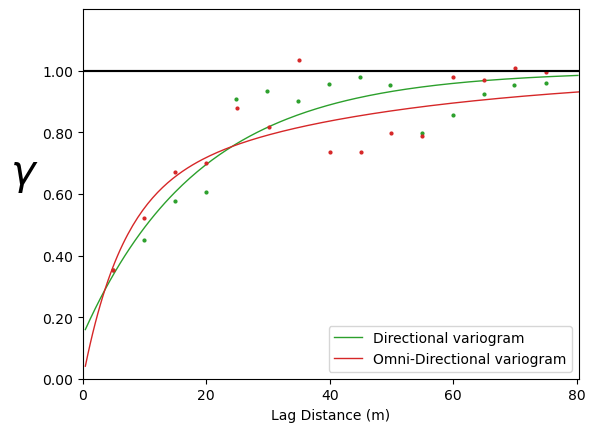

In [13]:
fig, ax = expvario.plot(c="C2")
vario_model.plot_draw(ax=ax, c="C2", label="Directional variogram")
expvario_omni.plot(ax=ax, c="C3")
vario_model_omni.plot_draw(ax=ax, c="C3", label="Omni-Directional variogram")
_ = ax.legend(loc=4)

---
# Automated Nugget Inference

The nugget value can be determined based on its relationship to volume support as shown above. This approach is summarized by Babakhani (2012). The variance of independent random factors at larger scale $V$ when averaged from a smaller scale $v$ is given by the equation below where $V \approx n \times v$. 

$$
\sigma_{V}^{2} = \text{Var}\left(Z_{V}\right) = \frac{\sigma_{v}^{2}}{n}
$$

The variogram sill corresponds to the variance and is the sum of the nugget $C_{0}$ component and the aggregated contribution from other ranged structures $C_{1}$.

$$
\sigma_{v}^{2} = C_{0} + C_{1} 
$$

When compositing at different scales the variance will reduce. For small sizes, it is reasonable to assume that the variance reduction is happening due to the nugget component. With that assumption, the variance at larger scale $V$ can be calculated with:

$$
\sigma_{v}^{2} = \frac{C_{0}}{n} + C_{1}
$$

The last two equations can be combined for the inference of the point scale nugget with:


$$
C_{0} = \left(\sigma_{v}^{2}-\sigma_{V}^{2}\right) \times \frac{n}{n-1}
$$

The technique relies on strong assumptions that may not hold for relatively large composite sizes. These values are used as a guidance when deciding the actual nugget to be used for each variogram model.




[Babakhani, M., & Deutsch, C. V. (2012). Compositing for nugget effect (CCG Annual Report 14). Edmonton AB: University of Alberta](https://www.ccgalberta.com/ccgresources/report14/2012-309_compositing_for_the_nugget_effect.pdf)

Putting this approach into practice, review the distribution of interval lengths present in the raw assay data:

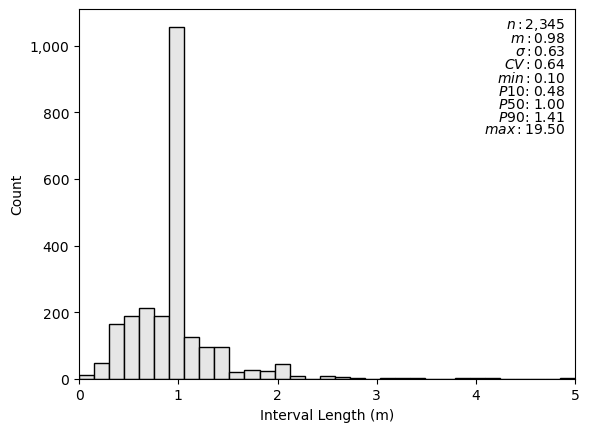

In [14]:
assay['Interval Length (m)'] = assay[assay.ito] - assay[assay.ifrom]
_ = assay.histplot('Interval Length (m)', xlim=(0, 5), num_bin=33)

Below, `rmsp.VarioNugget` is used to infer the nugget value based on a series of sample lengths, following the described methodology above. For each iteration despiking, normal score transform and desurveying is applied prior to nugget inference. Nugget inference is performed in normal scores for improved stability, before back-transforming the results. An interval of 1m is considered as the `point_size` and multiples of it (`[2,3,4,5]`) are considered as  composite lengths. `ref_n=2` means that the calculated nugget effect will be based on the composite length of 2m, for reasons that will be shown.

In [15]:
vario_nugget = rmsp.VarioNugget(
    collar=collar,
    survey=survey,
    interval=assay,
    var="CU",
    point_size=1.0,
    multiples=comp_lengths[1:],
    min_fraction=0.0,
    progressbar=False,
    ref_n=2
)

Results displayed below show:
 1. Point Nugget - the point scale nugget calculated based on each respective scale (ideally consistent across scales)
 1. Composite Nugget - the nugget of each respective scale, calculated based on the associated scale (ideally decreasing with scale)
 1. Composite Nugget (Ref. N=2) - the nugget of each respective scale, calculated based on the main reference scale (ideally decreasing with scale)
 
Results of the last item matches expectation, with each increase in scale exhibiting a monotonic decrease in the nugget effect. The point and composite scale nugget effects, calculated on other individual scales show varying degrees of stability. The point scale nugget jumping to 0.16/0.15 at 3/4m distance may suggest that the assumption of variance being attributed solely to the nugget effect (rather than other structured variance) is beginning to break down.

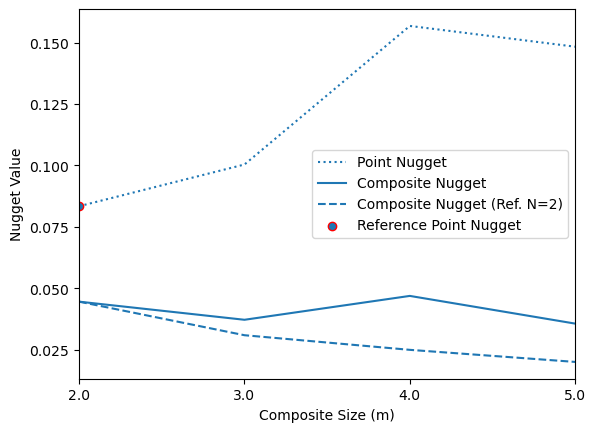

In [16]:
_ = vario_nugget.plot_nugget()

The calculated nugget effects above (based on Ref. N=2) are used along with specified fitting parameters for fitting omni-directional experimental variograms at each scale. The nugget effects appear to be reasonable at each scale with respect to the experimental variograms and the fit models.

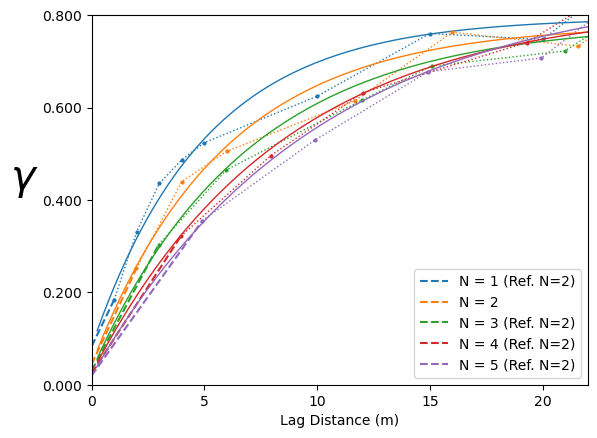

In [17]:
fit_pars = dict(num_lags=8, num_struct=2, shapes="exponential")
fig, ax = vario_nugget.plot(multiples='all', **fit_pars)
rmsp.format_plot(ax, xlim=(0, 22), ylim=(0, 0.8))

Summarizing, calculating the nugget effect automatically appears work well in this example, although practitioners should be careful to inspect stability of the calculated point/composite scale variograms, and choose the reference scale accordingly.

<footer>
<div style="text-align:center">    
    <p style="text-align:center; color:#00797C"> Partners: </p>
    <a href="https://resourcemodelingsolutions.com"><img class="rs" style="max-width:200px;"    src="https://geostatisticslessons.com/images/icons/resource_modeling_solutions_logo.png">
    </a>
    <a  href="https://geostatisticslessons.com/termsofuse"> <p style="text-align:center; color:#00797C">  Terms of Use </p></a>
    <a href="mailto:contact@resmodsol.com"> <p style="text-align:center; color:#00589d">Contact Resource Modeling Solutions about a commercial or academic license for RMSP</p> </a>
</div>
</footer>